In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.subplots as sp

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/marvel-cinematic-universe-film-list/mcu_films.csv


In [2]:
mcu_df = pd.read_csv('/kaggle/input/marvel-cinematic-universe-film-list/mcu_films.csv')
mcu_df.head()

,Movie,Length_hrs,Length_min,Release_date,Opening_weekend_us,Gross_us,Gross_world
0,Iron Man,2,6,5/2/2008,98618668,319034126,585796247
1,The Incredible Hulk,1,52,6/12/2008,55414050,134806913,264770996
2,Iron Man 2,2,4,5/7/2010,128122480,312433331,623933331
3,Thor,1,55,5/6/2011,65723338,181030624,449326618
4,Captain America: The First Avenger,2,4,7/22/2011,65058524,176654505,370569774


In [3]:
mcu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Movie               23 non-null     object
 1   Length_hrs          23 non-null     int64 
 2   Length_min          23 non-null     int64 
 3   Release_date        23 non-null     object
 4   Opening_weekend_us  23 non-null     int64 
 5   Gross_us            23 non-null     int64 
 6   Gross_world         23 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.4+ KB


In [4]:
mcu_df['Movie_length'] = mcu_df['Length_hrs'] * 60 + mcu_df['Length_min']
mcu_df.drop(['Length_hrs', 'Length_min'], axis = 1, inplace = True)
mcu_df.head()

,Movie,Release_date,Opening_weekend_us,Gross_us,Gross_world,Movie_length
0,Iron Man,5/2/2008,98618668,319034126,585796247,126
1,The Incredible Hulk,6/12/2008,55414050,134806913,264770996,112
2,Iron Man 2,5/7/2010,128122480,312433331,623933331,124
3,Thor,5/6/2011,65723338,181030624,449326618,115
4,Captain America: The First Avenger,7/22/2011,65058524,176654505,370569774,124


In [5]:
mcu_df['Release_date'] = pd.to_datetime(mcu_df['Release_date'])

mcu_df_sorted = mcu_df.sort_values('Release_date')

first_mcu_movie = mcu_df_sorted.iloc[0]
last_mcu_movie = mcu_df_sorted.iloc[-1]

print("According to the dataset:")
print("First released MCU Movie is {} in {}".format(first_mcu_movie[0], first_mcu_movie[1]))
print("Last released MCU Movie is {} in {}".format(last_mcu_movie[0], last_mcu_movie[1]))

According to the dataset:
First released MCU Movie is Iron Man in 2008-05-02 00:00:00
Last released MCU Movie is Spiderman: Far from Home in 2019-07-02 00:00:00


In [6]:
longest_mcu_movies = mcu_df.nlargest(5, 'Movie_length')
shortest_mcu_movies = mcu_df.nsmallest(5, 'Movie_length')

fig = go.Figure()

fig.add_trace(go.Bar(x = longest_mcu_movies['Movie'],
                     y = longest_mcu_movies['Movie_length'],
                     name = 'Longest MCU Movies',
                     marker_color = 'green'))
fig.add_trace(go.Bar(x = shortest_mcu_movies['Movie'],
                    y = shortest_mcu_movies['Movie_length'],
                    name = 'Shortest MCU Movies',
                    marker_color = 'lightsalmon'))
fig.update_layout(barmode = 'group', title = 'Longest & Shortest MCU Movies', xaxis_title = 'Movie Title', yaxis_title = 'Movie Length (mins)')

fig.show()

**As can be seen from the above graph, "Avengers: Endgame" is the longest MCU movie with 181 min duration time and it followed by "Avengers: Infinity War" which has 149 mins duration time. On the other hand, shortest MCU movies are "The Incredible Hulk" and "Thor: The Dark World". They have 112 mins duration time**

In [7]:
biggest_openers = mcu_df.nlargest(5, 'Opening_weekend_us')
smallest_openers = mcu_df.nsmallest(5, 'Opening_weekend_us')

fig = sp.make_subplots(rows = 1, cols = 2, subplot_titles = ("Biggest US Weekend Openers", "Smallest US Weekend Openers"))

fig.add_trace(go.Scatter(x = biggest_openers['Movie'], y = biggest_openers['Opening_weekend_us'],
                         mode = 'markers',
                         marker = dict(size = 10, color = 'goldenrod'),
                         name = 'Biggest US Weekend Openers'), row = 1, col = 1)

fig.add_trace(go.Scatter(x = smallest_openers['Movie'], y = smallest_openers['Opening_weekend_us'],
                         mode = 'markers',
                         marker = dict(size = 10, color = 'magenta'),
                         name = 'Smallest US Weekend Openers'), row = 1, col = 2)

fig.update_layout(title = 'Biggest & Smallest US Weekend Openers', xaxis_title = 'Movie Name', yaxis_title = 'Year')

fig.show()

In [8]:
biggest_us = mcu_df.nlargest(5, 'Gross_us')
smallest_us = mcu_df.nsmallest(5, 'Gross_us')

fig = go.Figure()

fig.add_trace(go.Bar(x = biggest_us['Movie'],
                     y = biggest_us['Gross_us'],
                     name = 'Biggest US Gross',
                     marker_color = 'blue'))
fig.add_trace(go.Bar(x = smallest_us['Movie'],
                    y = smallest_us['Gross_us'],
                    name = 'Biggest Worldwide Gross',
                    marker_color = 'red'))
fig.update_layout(barmode = 'group', title = 'Biggest & Smallest US Gross', xaxis_title = 'Movie Title', yaxis_title = 'Gross ($)')

fig.show()

In [9]:
biggest_worldwide = mcu_df.nlargest(6, 'Gross_world')

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

fig = go.Figure()

fig.add_trace(go.Bar(x = biggest_worldwide['Movie'],
                     y = biggest_worldwide['Gross_world'],
                     marker = dict (color = colors)))

fig.update_layout(
    title="Top 6 MCU Films with Highest Revenue",
    xaxis_title="Movie",
    yaxis_title="Revenue",
    barmode="stack"
)

fig.show()

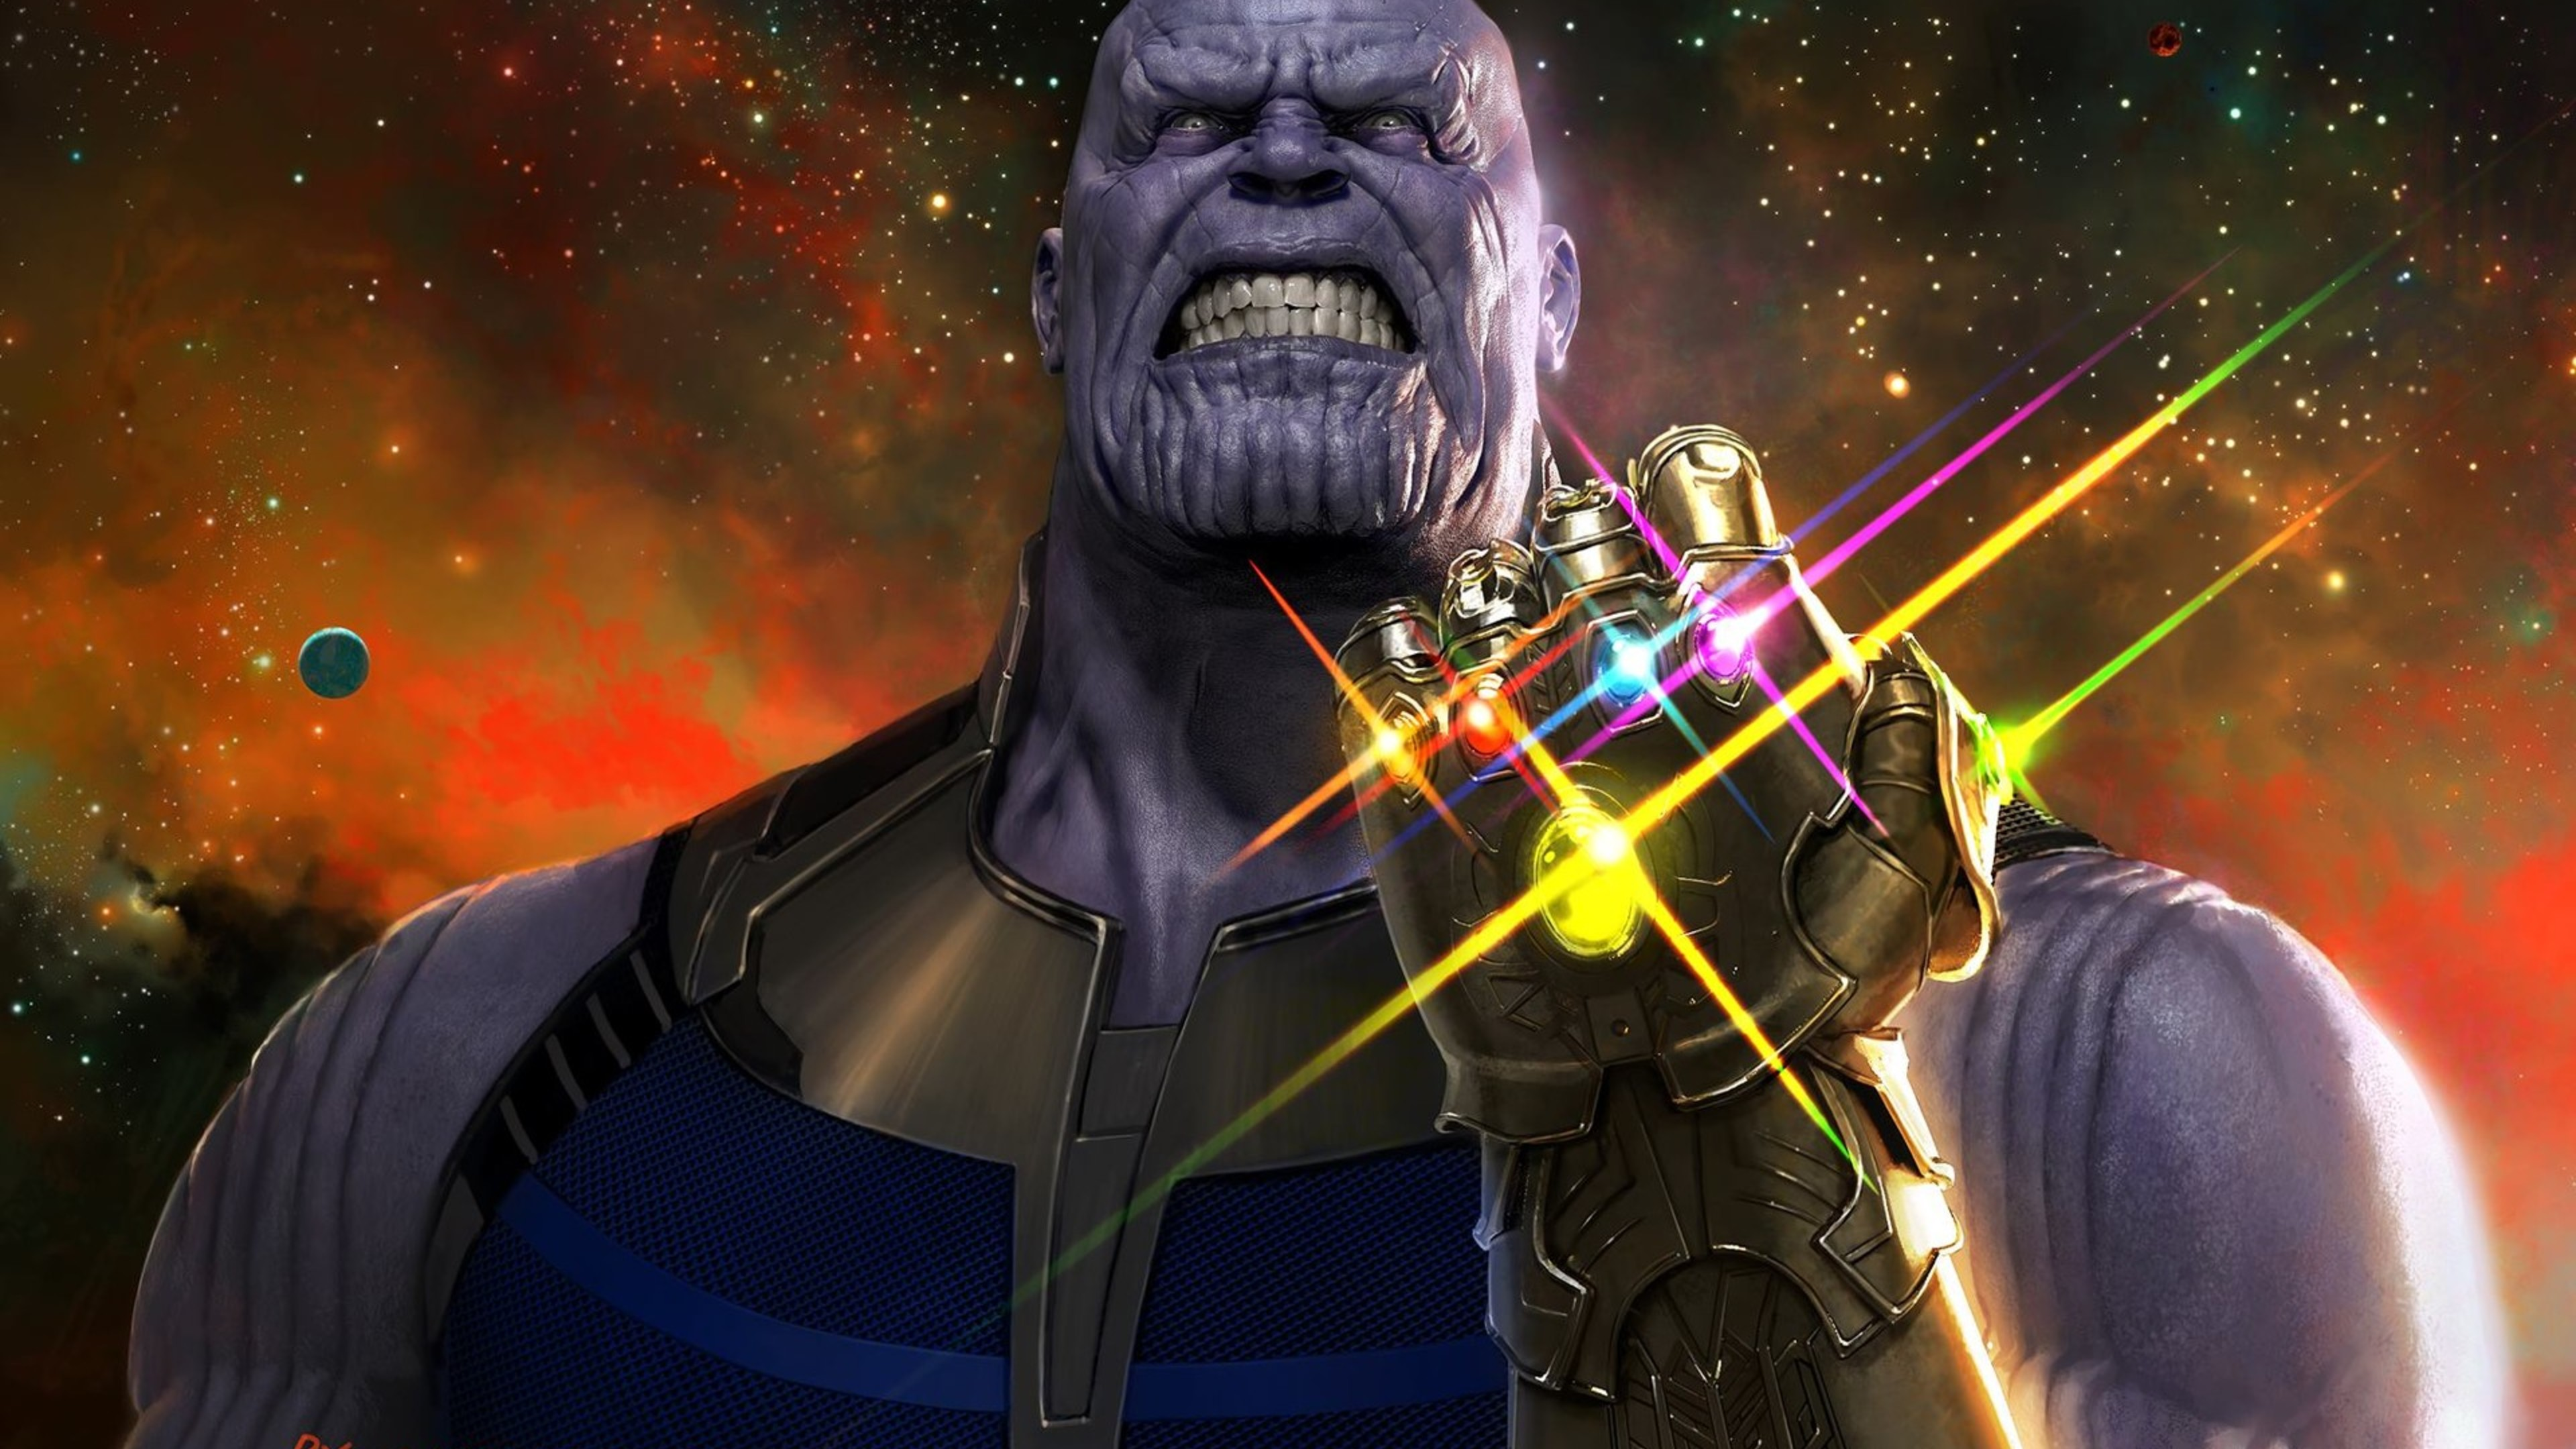